# Exploring Corpora with NLTK: Second Part

In [76]:
import nltk

The whole list of corpora and tools that have built-in support in NLTK can be consulted here:

http://www.nltk.org/nltk_data/

http://www.nltk.org/howto/corpus.html

In [77]:
nltk.download("gutenberg")

[nltk_data] Downloading package gutenberg to
[nltk_data]     /home/francesco/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

# Supported corpora

These corpora are those that have built-in support and can be donwnload using `nltk.download()`. An overview and an introduction of the built-in, downloadable corpora can be consulted [here](http://www.nltk.org/howto/corpus.html)

## Plain-text corpora

These are the easiest corpora. They are stored (generally) in simple txt files and contain a very minimal set of metadata. No linguistic annotation. We have already used some texts out of plain-text corpora last week exploring the `book` collection

In [78]:
from nltk.corpus import gutenberg, state_union, movie_reviews

We have already mentioned some important attributes and methods that are common to all corpus readers. They include methods to get:
* some documentation (the README)
* the full text of the corpus (as a single string): `.raw()`
* a list of files included in a corpus: `.fileids()`
* a list of the sentences, words, and paragraphs
    - `.sents(optional:fileid)`
    - `.words()`
    - `.paras()`

### Non-categorized corpora

In [79]:
print(gutenberg.readme())

Project Gutenberg Selections
http://gutenberg.net/

This corpus contains etexts from from Project Gutenberg,
by the following authors:

* Jane Austen (3)
* William Blake (2)
* Thornton W. Burgess
* Sarah Cone Bryant
* Lewis Carroll
* G. K. Chesterton (3)
* Maria Edgeworth
* King James Bible
* Herman Melville
* John Milton
* William Shakespeare (3)
* Walt Whitman

The beginning of the body of each book could not be identified automatically,
so the semi-generic header of each file has been removed, and included below.
Some source files ended with a line "End of The Project Gutenberg Etext...",
and this has been deleted.

Information about Project Gutenberg (one page)

We produce about two million dollars for each hour we work.  The
fifty hours is one conservative estimate for how long it we take
to get any etext selected, entered, proofread, edited, copyright
searched and analyzed, the copyright letters written, etc.  This
projected audience is one hundred million readers.  If our value


In [80]:
gutfiles = gutenberg.fileids()
gutfiles

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [85]:
len(gutenberg.words(['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt']))

432174

In [82]:
print(gutenberg.raw()[:1000])

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.  Her mother
had died too long ago for her to have more than an indistinct
remembrance of her caresses; and her place had been supplied
by an excellent woman as governess, who had fallen little short
of a mother in affection.

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.  Between _them_ it was more the intimacy
of sisters.  Even before Miss Taylor had ceased to hold the nominal
office of governess, the mildness o

We can always use the `fileid` to just access one single file. BTW I'd be interested to know how many words each of these files contains, to see whether they're balanced. How do we do that?

In [91]:
for f in gutfiles:
    print(f, len(gutenberg.words(f)))

austen-emma.txt 192427
austen-persuasion.txt 98171
austen-sense.txt 141576
bible-kjv.txt 1010654
blake-poems.txt 8354
bryant-stories.txt 55563
burgess-busterbrown.txt 18963
carroll-alice.txt 34110
chesterton-ball.txt 96996
chesterton-brown.txt 86063
chesterton-thursday.txt 69213
edgeworth-parents.txt 210663
melville-moby_dick.txt 260819
milton-paradise.txt 96825
shakespeare-caesar.txt 25833
shakespeare-hamlet.txt 37360
shakespeare-macbeth.txt 23140
whitman-leaves.txt 154883


In [ ]:
gutenberg.words()[:50]

In [95]:
gutenberg.sents()[3:5]

[['Emma',
  'Woodhouse',
  ',',
  'handsome',
  ',',
  'clever',
  ',',
  'and',
  'rich',
  ',',
  'with',
  'a',
  'comfortable',
  'home',
  'and',
  'happy',
  'disposition',
  ',',
  'seemed',
  'to',
  'unite',
  'some',
  'of',
  'the',
  'best',
  'blessings',
  'of',
  'existence',
  ';',
  'and',
  'had',
  'lived',
  'nearly',
  'twenty',
  '-',
  'one',
  'years',
  'in',
  'the',
  'world',
  'with',
  'very',
  'little',
  'to',
  'distress',
  'or',
  'vex',
  'her',
  '.'],
 ['She',
  'was',
  'the',
  'youngest',
  'of',
  'the',
  'two',
  'daughters',
  'of',
  'a',
  'most',
  'affectionate',
  ',',
  'indulgent',
  'father',
  ';',
  'and',
  'had',
  ',',
  'in',
  'consequence',
  'of',
  'her',
  'sister',
  "'",
  's',
  'marriage',
  ',',
  'been',
  'mistress',
  'of',
  'his',
  'house',
  'from',
  'a',
  'very',
  'early',
  'period',
  '.']]

### Categorized corpora

The corpus `movie_reviews` is also a plain-text corpus, but it has a special feature: it is a **categorized** corpus, i.e. it implements a system of categorization. Files are classified in groups and NLTK users can select to access the whole set or just one category. As this corpus is used to test (and train) tools for automatic *sentiment analysis* the two categories in this case are simply: positive vs negative

In [96]:
movie_reviews.categories()

['neg', 'pos']

In [98]:
gutenberg.categories()

AttributeError: 'PlaintextCorpusReader' object has no attribute 'categories'

In [101]:
len(movie_reviews.fileids(categories="neg"))

1000

What are the most frequent words in each category?

In [102]:
from nltk.probability import FreqDist
pos_freq = FreqDist(movie_reviews.words(categories=["pos"]))
neg_freq = FreqDist(movie_reviews.words(categories=["neg"]))

In [104]:
neg_freq["bad"]

1034

In [106]:
bad_pos = pos_freq["bad"] / len(movie_reviews.words(categories=["pos"])) * 1000
bad_neg = neg_freq["bad"] / len(movie_reviews.words(categories=["neg"])) * 1000

print(bad_pos, bad_neg)

0.4336002997967724 1.3763617195736206


In [109]:
for i,v in enumerate(["a", "b", "c"]):
    print(i,v)

0 a
1 b
2 c


In [110]:
for p,n in zip(pos_freq.most_common(30),neg_freq.most_common(30)):
    print(p, n)

(',', 42448) (',', 35269)
('the', 41471) ('the', 35058)
('.', 33714) ('.', 32162)
('a', 20196) ('a', 17910)
('and', 19896) ('and', 15680)
('of', 18636) ('of', 15487)
('to', 16517) ('to', 15420)
("'", 15268) ("'", 15317)
('is', 14059) ('is', 11136)
('in', 11725) ('in', 10097)
('s', 9659) ('"', 9120)
('"', 8492) ('s', 8854)
('it', 8351) ('that', 7803)
('that', 8121) ('it', 7756)
('-', 7931) ('-', 7664)
('as', 6478) (')', 5742)
(')', 6039) ('(', 5650)
('(', 6014) ('with', 4941)
('with', 5851) ('this', 4930)
('his', 5588) ('as', 4900)
('for', 5260) ('i', 4787)
('film', 5230) ('for', 4701)
('he', 4936) ('film', 4287)
('this', 4648) ('but', 4142)
('but', 4492) ('his', 3999)
('i', 4102) ('he', 3928)
('on', 3727) ('on', 3658)
('are', 3713) ('t', 3555)
('by', 3466) ('movie', 3246)
('who', 3057) ('are', 3236)


### Wordlist corpora

The list of most frequent words in the pos and neg categories is incredbily uninteresting! They're basically the same words. What's more, almost all of them are high-frequency `function words` that are not informative. If we want a more meaningful comparison we should filter them out.

How do we do it? First of all, we need a list of those high-frequency words... Here is where a special `wordlist corpus` (i.e. a corpus that is just made of a list of words) comes to help.

In [111]:
from nltk.corpus import stopwords

["Stop words"](https://en.wikipedia.org/wiki/Stop_words) is a technical definition of these uninformative, high-frequency words that are filtered out of texts in order to leave room only to more informative content words. Depending of your purposes, it may make sense to filter out (some type of) stop words.

The loaded corpus include a list of common stop words for a few languages (each language is a file).

Keep in mind that, as the linked Wikipedia page says, there is no single definition of "stop words". The full list depends only on your purposes. It may also make sense to *keep* all words!

In [112]:
stopwords.fileids()

['arabic',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'greek',
 'greek~',
 'hungarian',
 'italian',
 'kazakh',
 'norwegian',
 'portuguese',
 'romanian',
 'russian',
 'spanish',
 'swedish',
 'turkish']

Obviously, this is just a list! We can delete / add as many words as we want. For instance, I would like to keep "I", "me", "my", "mysefl" "we", "our"!

But for the present, let's just work with the given list...

How do we do use this list?

In [119]:
%%time
pos_words = [w for w in movie_reviews.words(categories="pos") if w.isalpha() and w not in en_stops]
neg_words = [w for w in movie_reviews.words(categories="neg") if w.isalpha() and w not in en_stops]

CPU times: user 3.93 s, sys: 52 ms, total: 3.98 s
Wall time: 3.98 s


Let us redo the experiment to see if things have improved!

In [120]:
pos_freq = FreqDist(pos_words)
neg_freq = FreqDist(neg_words)

for p,n in zip(pos_freq.most_common(30),neg_freq.most_common(30)):
    print(p, n)

('film', 5230) ('film', 4287)
('one', 3052) ('movie', 3246)
('movie', 2525) ('one', 2800)
('like', 1802) ('like', 1888)
('good', 1248) ('even', 1386)
('story', 1246) ('time', 1168)
('time', 1243) ('good', 1163)
('also', 1200) ('would', 1090)
('even', 1179) ('get', 1052)
('well', 1123) ('bad', 1034)
('character', 1078) ('much', 1011)
('life', 1057) ('character', 942)
('much', 1038) ('story', 923)
('would', 1019) ('plot', 917)
('first', 1004) ('two', 912)
('two', 999) ('characters', 873)
('characters', 986) ('make', 851)
('see', 965) ('first', 832)
('way', 929) ('could', 791)
('get', 897) ('see', 784)
('films', 884) ('well', 783)
('best', 829) ('really', 781)
('make', 791) ('also', 767)
('people', 789) ('way', 764)
('many', 780) ('little', 726)
('really', 777) ('scene', 670)
('little', 775) ('people', 666)
('man', 764) ('never', 653)
('great', 751) ('films', 652)
('scene', 727) ('action', 652)


That's somehow better, but there is still much work to do... For instance?

## Tagged corpora

The Brown Corpus is not only a categorized corpus (like the movie review). It is also a **tagged corpus**, i.e. each token in the corpus is pos-tagged! Tagged corpora have special methods to work with this word-by-word annotation.

In [121]:
from nltk.corpus import brown

In [122]:
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [124]:
plain_sent = brown.sents(categories="mystery")[0]
plain_sent

['There',
 'were',
 'thirty-eight',
 'patients',
 'on',
 'the',
 'bus',
 'the',
 'morning',
 'I',
 'left',
 'for',
 'Hanover',
 ',',
 'most',
 'of',
 'them',
 'disturbed',
 'and',
 'hallucinating',
 '.']

In [127]:
tagged_sent = brown.tagged_sents()[0]#tagset='universal'
tagged_sent

[('The', 'AT'),
 ('Fulton', 'NP-TL'),
 ('County', 'NN-TL'),
 ('Grand', 'JJ-TL'),
 ('Jury', 'NN-TL'),
 ('said', 'VBD'),
 ('Friday', 'NR'),
 ('an', 'AT'),
 ('investigation', 'NN'),
 ('of', 'IN'),
 ("Atlanta's", 'NP$'),
 ('recent', 'JJ'),
 ('primary', 'NN'),
 ('election', 'NN'),
 ('produced', 'VBD'),
 ('``', '``'),
 ('no', 'AT'),
 ('evidence', 'NN'),
 ("''", "''"),
 ('that', 'CS'),
 ('any', 'DTI'),
 ('irregularities', 'NNS'),
 ('took', 'VBD'),
 ('place', 'NN'),
 ('.', '.')]

In [129]:
brown.tagged_words(categories="mystery")[:10]

[('There', 'EX'),
 ('were', 'BED'),
 ('thirty-eight', 'CD'),
 ('patients', 'NNS'),
 ('on', 'IN'),
 ('the', 'AT'),
 ('bus', 'NN'),
 ('the', 'AT'),
 ('morning', 'NN'),
 ('I', 'PPSS')]

Other languages have tagged data, apart from English

In [130]:
from nltk.corpus import indian
print(indian.readme())

Indian Language POS-Tagged Corpus
Collected by A Kumaran, Microsoft Research, India

Distributed with permission

Contents:
- Bangla: IIT Kharagpur
- Hindi: Microsoft Research India
- Marathi: IIT Bombay
- Telugu: IIIT Hyderabad


// Tagset developed at IIIT - Hyderabad after consultations with      
// several institutions through two workshops. 
 
 
A Part of Speech Tagger for Indian 
Languages (POS tagger) 
 
 
Introduction: 
 
The significance of large annotated corpora in the present day NLP is 
widely known. Annotated corpora serve as an important tool for 
investigators of natural language processing, speech recognition and 
other related areas. It proves to be a basic building block for 
constructing statistical models for automatic processing of natural 
languages.  
 
Many such corpora are available for languages across the world and have 
proved to be a useful step towards natural language processing. 
 
Looking at the scenario for Indian languages, not much work has been 
c

In [131]:
indian.tagged_words("hindi.pos")[:20]

[('पूर्ण', 'JJ'),
 ('प्रतिबंध', 'NN'),
 ('हटाओ', 'VFM'),
 (':', 'SYM'),
 ('इराक', 'NNP'),
 ('संयुक्त', 'NNC'),
 ('राष्ट्र', 'NN'),
 ('।', 'SYM'),
 ('इराक', 'NNP'),
 ('के', 'PREP'),
 ('विदेश', 'NNC'),
 ('मंत्री', 'NN'),
 ('ने', 'PREP'),
 ('अमरीका', 'NNP'),
 ('के', 'PREP'),
 ('उस', 'PRP'),
 ('प्रस्ताव', 'NN'),
 ('का', 'PREP'),
 ('मजाक', 'NVB'),
 ('उड़ाया', 'VFM')]

In [132]:
hindi_tags = [w[-1] for w in indian.tagged_words("hindi.pos")]

In [133]:
hindi_tags[:5]

['JJ', 'NN', 'VFM', 'SYM', 'NNP']

## XML corpora

Some corpora are stored in XML files. Those corpora (which may include a wide variety of metadata) have special methods and attributes to access their content. One famous example is the Shakespeare's corpus

In [ ]:
from nltk.corpus import shakespeare

In [ ]:
from xml.etree import ElementTree
from xml import etree

In [ ]:
shakespeare.fileids()

In [134]:
play = shakespeare.xml('hamlet.xml')

In [ ]:
shakespeare.raw("hamlet.xml")[:1000]

In [135]:
print(ElementTree.tostring(play)[:1000].decode("utf-8"))

<PLAY>
<TITLE>The Tragedy of Hamlet, Prince of Denmark</TITLE>



<PERSONAE>
<TITLE>Dramatis Personae</TITLE>

<PERSONA>CLAUDIUS, king of Denmark. </PERSONA>
<PERSONA>HAMLET, son to the late, and nephew to the present king.</PERSONA>
<PERSONA>POLONIUS, lord chamberlain. </PERSONA>
<PERSONA>HORATIO, friend to Hamlet.</PERSONA>
<PERSONA>LAERTES, son to Polonius.</PERSONA>
<PERSONA>LUCIANUS, nephew to the king.</PERSONA>

<PGROUP>
<PERSONA>VOLTIMAND</PERSONA>
<PERSONA>CORNELIUS</PERSONA>
<PERSONA>ROSENCRANTZ</PERSONA>
<PERSONA>GUILDENSTERN</PERSONA>
<PERSONA>OSRIC</PERSONA>
<GRPDESCR>courtiers.</GRPDESCR>
</PGROUP>

<PERSONA>A Gentleman</PERSONA>
<PERSONA>A Priest. </PERSONA>

<PGROUP>
<PERSONA>MARCELLUS</PERSONA>
<PERSONA>BERNARDO</PERSONA>
<GRPDESCR>officers.</GRPDESCR>
</PGROUP>

<PERSONA>FRANCISCO, a soldier.</PERSONA>
<PERSONA>REYNALDO, servant to Polonius.</PERSONA>
<PERSONA>Players.</PERSONA>
<PERSONA>Two Clowns, grave-diggers.</PERSONA>
<PERSONA>FORTINBRAS, prince of Norway. </PER

In [ ]:
speakers = set(speaker.text for speaker in play.findall('*/*/*/SPEAKER'))
speakers

## Parsed corpora

There is a long list of parsed corpora and treebanks. Several of them are part of various [CoNLL](http://www.conll.org/) shared tasks on parsing (especially the CoNLL-X, 2006). Those corpora generally adopt an exchange format based on a series of tab-separated columns where the linguistic properties are registered. Sentences as separated by an empty line. For a list of columns in the traditional CoNLL-X format see [this paper](http://anthology.aclweb.org/W/W06/W06-2920.pdf).

Note that [Universal Dependencies](http://universaldependencies.org) (of which we spoke on the 7th Common Session) uses a [revised format](http://universaldependencies.org/format.html) of CoNLL-X, which is not yet supported by NLTK readers. Anyone voluteering to design a corpus reader for UD? :-)


In [136]:
from nltk.corpus import alpino, conll2007

### Dependency Treebanks

In [137]:
conll2007.fileids()

['esp.test', 'esp.train', 'eus.test', 'eus.train']

In [138]:
conll2007.tagged_words("esp.train")[:5]

[('El', 'da'),
 ('aumento', 'nc'),
 ('del', 'sp'),
 ('índice', 'nc'),
 ('de', 'sp')]

In [140]:
type(s)

nltk.parse.dependencygraph.DependencyGraph

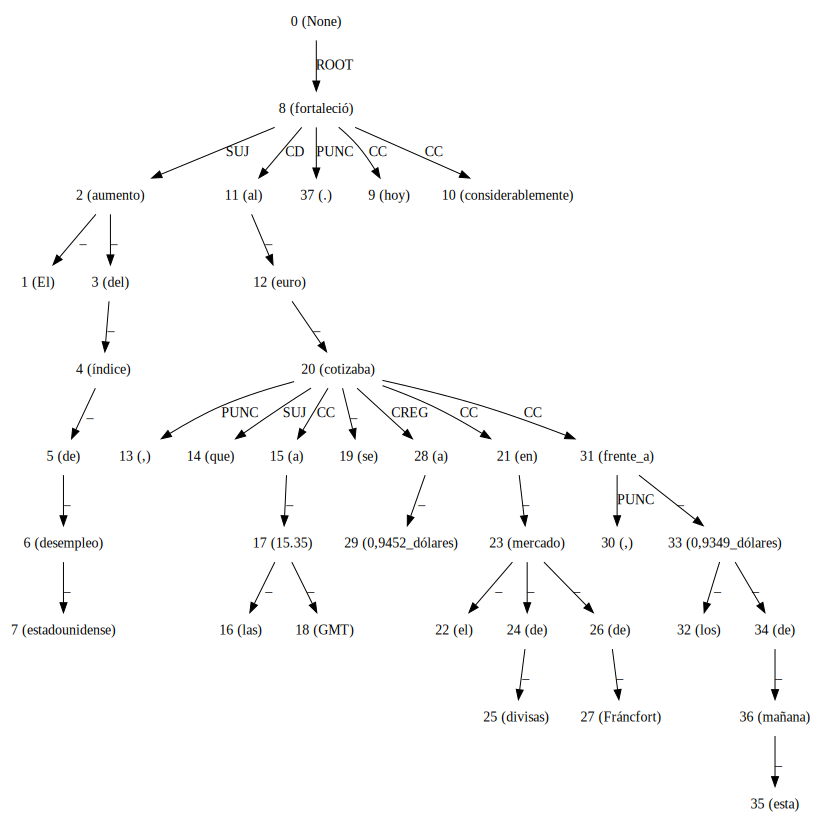

In [139]:
s = conll2007.parsed_sents("esp.train")[0]
s

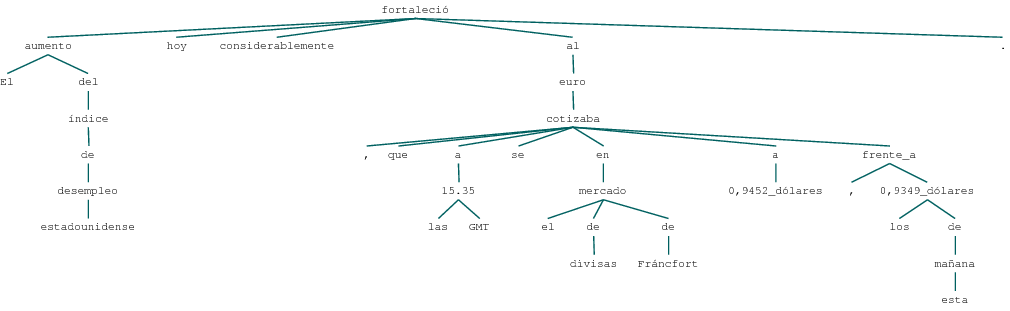

In [141]:
s.tree()

In [143]:
s.nodes[8]

{'address': 8,
 'ctag': 'v',
 'deps': defaultdict(list,
             {'CC': [9, 10], 'CD': [11], 'PUNC': [37], 'SUJ': [2]}),
 'feats': 'num=s|per=3|mod=i|tmp=s',
 'head': 0,
 'lemma': 'fortalecer',
 'rel': 'ROOT',
 'tag': 'vm',
 'word': 'fortaleció'}

In [144]:
for n in s.triples():
    print(n)

(('fortaleció', 'v'), 'SUJ', ('aumento', 'n'))
(('aumento', 'n'), '_', ('El', 'd'))
(('aumento', 'n'), '_', ('del', 's'))
(('del', 's'), '_', ('índice', 'n'))
(('índice', 'n'), '_', ('de', 's'))
(('de', 's'), '_', ('desempleo', 'n'))
(('desempleo', 'n'), '_', ('estadounidense', 'a'))
(('fortaleció', 'v'), 'CC', ('hoy', 'r'))
(('fortaleció', 'v'), 'CC', ('considerablemente', 'r'))
(('fortaleció', 'v'), 'CD', ('al', 's'))
(('al', 's'), '_', ('euro', 'n'))
(('euro', 'n'), '_', ('cotizaba', 'v'))
(('cotizaba', 'v'), 'PUNC', (',', 'F'))
(('cotizaba', 'v'), 'SUJ', ('que', 'p'))
(('cotizaba', 'v'), 'CC', ('a', 's'))
(('a', 's'), '_', ('15.35', 'z'))
(('15.35', 'z'), '_', ('las', 'd'))
(('15.35', 'z'), '_', ('GMT', 'n'))
(('cotizaba', 'v'), '_', ('se', 'p'))
(('cotizaba', 'v'), 'CC', ('en', 's'))
(('en', 's'), '_', ('mercado', 'n'))
(('mercado', 'n'), '_', ('el', 'd'))
(('mercado', 'n'), '_', ('de', 's'))
(('de', 's'), '_', ('divisas', 'n'))
(('mercado', 'n'), '_', ('de', 's'))
(('de', 's'), '

## Wordnet

You can load a version of the lexical database WordNet into NLTK and use the methods of the corpus to explore the synsets. For a nice introductory tutorial to the WordNet corpus reader see [here](http://www.nltk.org/howto/wordnet.html).

There is [a vast literature](https://wordnet.princeton.edu/wordnet/publications/) on WordNet. If you're interesting in knowing more about it, I recommend to start from [this book]().

In [145]:
from nltk.corpus import wordnet as wn

By using the WordNet corpus reader in NLTK you can perform several operations:

* look up the synsets a word belongs to (possibly restricting it by POS)

In [146]:
wn.synsets("dog")

[Synset('dog.n.01'),
 Synset('frump.n.01'),
 Synset('dog.n.03'),
 Synset('cad.n.01'),
 Synset('frank.n.02'),
 Synset('pawl.n.01'),
 Synset('andiron.n.01'),
 Synset('chase.v.01')]

In [147]:
wn.synsets("dog", pos=wn.NOUN)

[Synset('dog.n.01'),
 Synset('frump.n.01'),
 Synset('dog.n.03'),
 Synset('cad.n.01'),
 Synset('frank.n.02'),
 Synset('pawl.n.01'),
 Synset('andiron.n.01')]

* explore a synset

In [148]:
syn = wn.synset("dog.n.01")
syn

Synset('dog.n.01')

* get the whole list of lemmata in a synset (also in many languages!)

In [149]:
syn.lemma_names()

['dog', 'domestic_dog', 'Canis_familiaris']

In [157]:
# you need the Open Multilingual Wordnet (omw) package installed!
#nltk.download("omw")
syn.lemma_names(lang="")

WordNetError: Language is not supported.

* explore hypernyms/hyponyms of a synset

In [158]:
syn.hypernym_paths()[0]

[Synset('entity.n.01'),
 Synset('physical_entity.n.01'),
 Synset('object.n.01'),
 Synset('whole.n.02'),
 Synset('living_thing.n.01'),
 Synset('organism.n.01'),
 Synset('animal.n.01'),
 Synset('chordate.n.01'),
 Synset('vertebrate.n.01'),
 Synset('mammal.n.01'),
 Synset('placental.n.01'),
 Synset('carnivore.n.01'),
 Synset('canine.n.02'),
 Synset('dog.n.01')]

* explore other relations

In [159]:
# antonyms are defined for lemmata, not for synset
good = wn.synset('good.a.01')
good.lemmas()[0].antonyms()

[Lemma('bad.a.01.bad')]

### Examples of Phrase-Structure treebanks

Examples of parsed corpora with phrase-structure syntactic annotation include the *Penn Treebank* (only a sample is provided) or the *Sinica TB* of Chinese

In [ ]:
from nltk.corpus import treebank, sinica_treebank as sinica

In [ ]:
print(treebank.sents()[25])

In [ ]:
treebank.parsed_sents()[25]

In [ ]:
#nltk.download("sinica_treebank")
sinica.sents()[5]

In [ ]:
sinica.parsed_sents()[2]

# Importing your own corpora

As we saw, some corpora (e.g. the Penn Treebank or the CoNLL 2007 data) are just samples. Some other corpora, like the collection of the Universal Dependencies treebanks, is not yet supported. Or maybe you simply have put together a nice collection of texts that you want to explore using Python.

NLTK is always the right choice in this cases.

## Reading the corpus

If your corpus is similar to the built-in ones, then you will simply be able to use the built-in corpus readers and specify the path to your corpus. Your corpus will then be loaded exactly like the built-in ones.

Let us see an example with a collection of txt files.

In [160]:
my_corpus = nltk.corpus.PlaintextCorpusReader("../../Materials-Exercises/DATA/Session7/de_wiki", r'.*\.txt')
# or  ['deu_wikipedia_2010_10K-sentences.txt', 
#'deu_wikipedia_2014_10K-sentences.txt', 
#'deu_wikipedia_2016_10K-sentences']

In [161]:
my_corpus.fileids()

['deu_wikipedia_2010_10K-sentences.txt',
 'deu_wikipedia_2014_10K-sentences.txt',
 'deu_wikipedia_2016_10K-sentences.txt']

In [162]:
my_corpus.sents("deu_wikipedia_2010_10K-sentences.txt")[23]

['faz',
 '.',
 'net',
 ':',
 'Es',
 'sind',
 'die',
 'Tore',
 ',',
 'die',
 'sie',
 'glücklich',
 'machen',
 'Bundestrainerin',
 'Silvia',
 'Neid',
 'erklärte',
 ',',
 'dass',
 'es',
 'das',
 'Ziel',
 'und',
 'die',
 'Idee',
 'des',
 'Filmes',
 'war',
 ',',
 'die',
 'Nationalspielerinnen',
 'bekannter',
 'zu',
 'machen',
 '.']

In [ ]:
my_corpus.words()[:20]

## Tokenizing your corpus

Have a look at what happens here, with a sentence of the 2010 wikipedia file

In [ ]:
my_corpus.sents("deu_wikipedia_2010_10K-sentences.txt")[14:16]

You may have noticed that the tokenization of the sentence is wrong; this is because the sentence tokenizer rightly guessed that the period after the number was not sentence-ending in the case of the numbers followed by a lower case letter ("52. und") but was mistaken when the following letter was a capital.

One of the main reason why you may want to load your own corpora is to define your own sentence and word tokenizers. One of the many parameters of PlainTextCorpusReader lets you specify the tokenizers that you want to use.

You may for instance define your own tokenizers and pass them to the reader functions. There are many different ways to write your tokenizers (including complex rule-base system). Most of the time, you will be fine by simply defying some [regular expressions](https://www.regular-expressions.info/) like the default ones.

We may use a class called `RegexpTokenizer` to define our own regular-expression-based tokenizer.

In [ ]:
my_sent_tokenizer = nltk.RegexpTokenizer('(?<=[^0-9IXV])[.!?]+', gaps=True)

In [ ]:
tok_corpus = nltk.corpus.PlaintextCorpusReader("../../Materials-Exercises/DATA/Session7/de_wiki", ["deu_wikipedia_2010_10K-sentences.txt"], sent_tokenizer=my_sent_tokenizer)

In [ ]:
tok_corpus.sents()[14:16]

As for the word tokenizers, let's see what happens

In [ ]:
s = "They'll save and invest more."

In [ ]:
wh = nltk.tokenize.WhitespaceTokenizer()
wh.tokenize(s)

In [ ]:
nltk.tokenize.regexp_tokenize(s, pattern=r'\w+|[^\w\s]+')

In [ ]:
tbtok = nltk.tokenize.TreebankWordTokenizer()
tbtok.tokenize(s)